<br>
<br>

<p style="font-size: 30px; text-align: center; "><b>Data Analytics Project: Bike Sharing</b></p>

<br>
<br>

    Name  : Muhammad Reesa Rosyid

    Email : mreesa669@gmail.com

<h1 align='center'>Business Question</h1>

***

    1. What is the trend of bicycle rental from casual, registered or both types of customers as a whole from time to time?
    2. What are the habits of customers renting bicycles based on season, month, day, and hour, judging by the number of rentals or the number of rentals?
    3. What is the correlation between the number of bicycle rentals and the temperature in a particular season?

<h1 align='center'>Import Libraries</h1>

***

In [1]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns

<h1 align='center'>Data Wrangling</h1>

***

## Gathering Data

In [2]:
# Read csv
df_day = pd.read_csv('./Dataset/Bike Sharing/day.csv')
df_hour = pd.read_csv('./Dataset/Bike Sharing/hour.csv')

## Assessing Data

In [3]:
# Read top 5 of data
df_day.head(100)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2011-04-06,2,0,4,0,3,1,1,0.390833,0.387608,0.470833,0.263063,413,2395,2808
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,0.433696,0.602917,0.162312,571,2570,3141
97,98,2011-04-08,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,1471
98,99,2011-04-09,2,0,4,0,6,0,2,0.342500,0.341529,0.877500,0.133083,879,1576,2455


In [4]:
# Read top 5 of data
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# Look data info
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# Look data info
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Cleaning Data

In [7]:
# Look the missing value
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Look the missing value
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
# Look the duplicate value
df_hour.duplicated().sum()

0

In [10]:
# Look the duplicate value
df_day.duplicated().sum()

0

In [11]:
# Change data type from object to datetime on column dteday
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

In [12]:
# Drop column instant from both of dataframe
df_hour.drop(['instant'], axis=1, inplace=True)
df_day.drop(['instant'], axis=1, inplace=True)

<h1 align='center'>Exploratory Data Analysis (EDA)</h1>

***

In [13]:
# Look description data
df_day.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
dteday,731,2012-01-01 00:00:00,2011-01-01 00:00:00,2011-07-02 12:00:00,2012-01-01 00:00:00,2012-07-01 12:00:00,2012-12-31 00:00:00,NaN
season,731.0,2.49658,1.0,2.0,3.0,3.0,4.0,1.110807
yr,731.0,0.500684,0.0,0.0,1.0,1.0,1.0,0.500342
mnth,731.0,6.519836,1.0,4.0,7.0,10.0,12.0,3.451913
holiday,731.0,0.028728,0.0,0.0,0.0,0.0,1.0,0.167155
weekday,731.0,2.997264,0.0,1.0,3.0,5.0,6.0,2.004787
workingday,731.0,0.683995,0.0,0.0,1.0,1.0,1.0,0.465233
weathersit,731.0,1.395349,1.0,1.0,1.0,2.0,3.0,0.544894
temp,731.0,0.495385,0.05913,0.337083,0.498333,0.655417,0.861667,0.183051
atemp,731.0,0.474354,0.07907,0.337842,0.486733,0.608602,0.840896,0.162961


In [14]:
# Look description data
df_hour.describe(include='all').T

,count,mean,min,25%,50%,75%,max,std
dteday,17379,2012-01-02 04:08:34.552045568,2011-01-01 00:00:00,2011-07-04 00:00:00,2012-01-02 00:00:00,2012-07-02 00:00:00,2012-12-31 00:00:00,NaN
season,17379.0,2.50164,1.0,2.0,3.0,3.0,4.0,1.106918
yr,17379.0,0.502561,0.0,0.0,1.0,1.0,1.0,0.500008
mnth,17379.0,6.537775,1.0,4.0,7.0,10.0,12.0,3.438776
hr,17379.0,11.546752,0.0,6.0,12.0,18.0,23.0,6.914405
holiday,17379.0,0.02877,0.0,0.0,0.0,0.0,1.0,0.167165
weekday,17379.0,3.003683,0.0,1.0,3.0,5.0,6.0,2.005771
workingday,17379.0,0.682721,0.0,0.0,1.0,1.0,1.0,0.465431
weathersit,17379.0,1.425283,1.0,1.0,1.0,2.0,4.0,0.639357
temp,17379.0,0.496987,0.02,0.34,0.5,0.66,1.0,0.192556


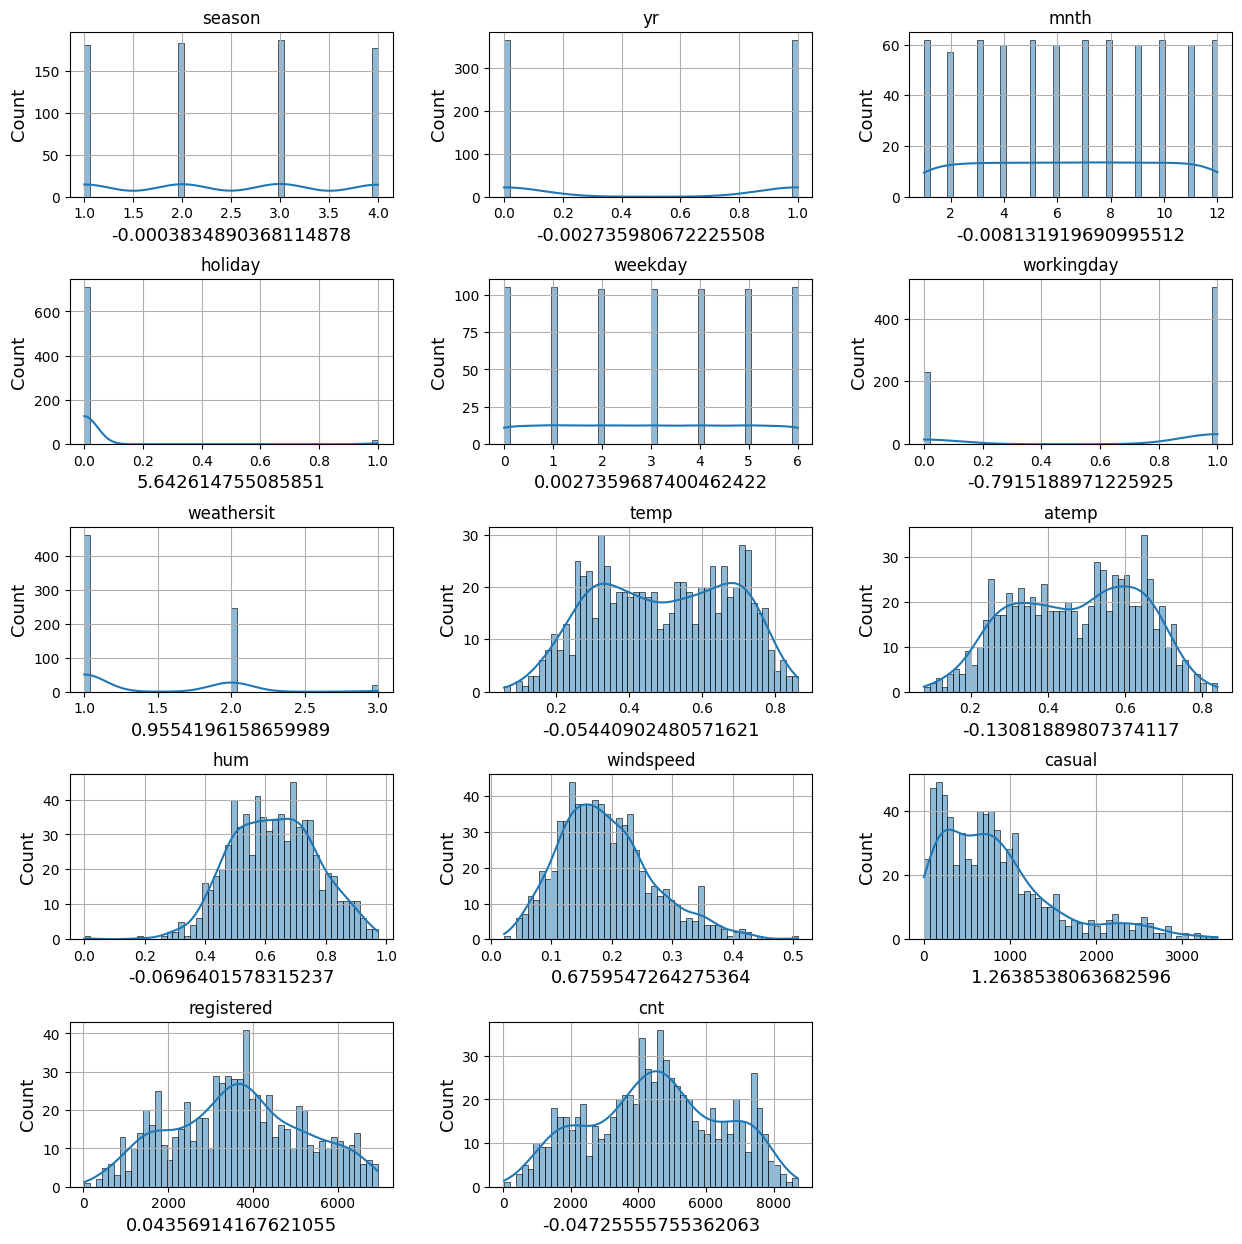

In [15]:
# Look data distribution of the data df_day

# Set Parameter column
cols = ['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

# Set figure plt
plt.figure(figsize=(15,15))

# Make looping to create subplot the distribution from each feature
for i, col in enumerate(cols):
    # Determine the number of sublots
    plt.subplot(5,3,i+1)
    
    # Declare value x and y label
    plt.xlabel(f'{skew(df_day[col])}', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    
    # Adjustment
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.grid(True)
    
    # Create text title
    plt.title(col)
    
    # Plotting
    sns.histplot(data=df_day, x=col, bins=50, kde=True)

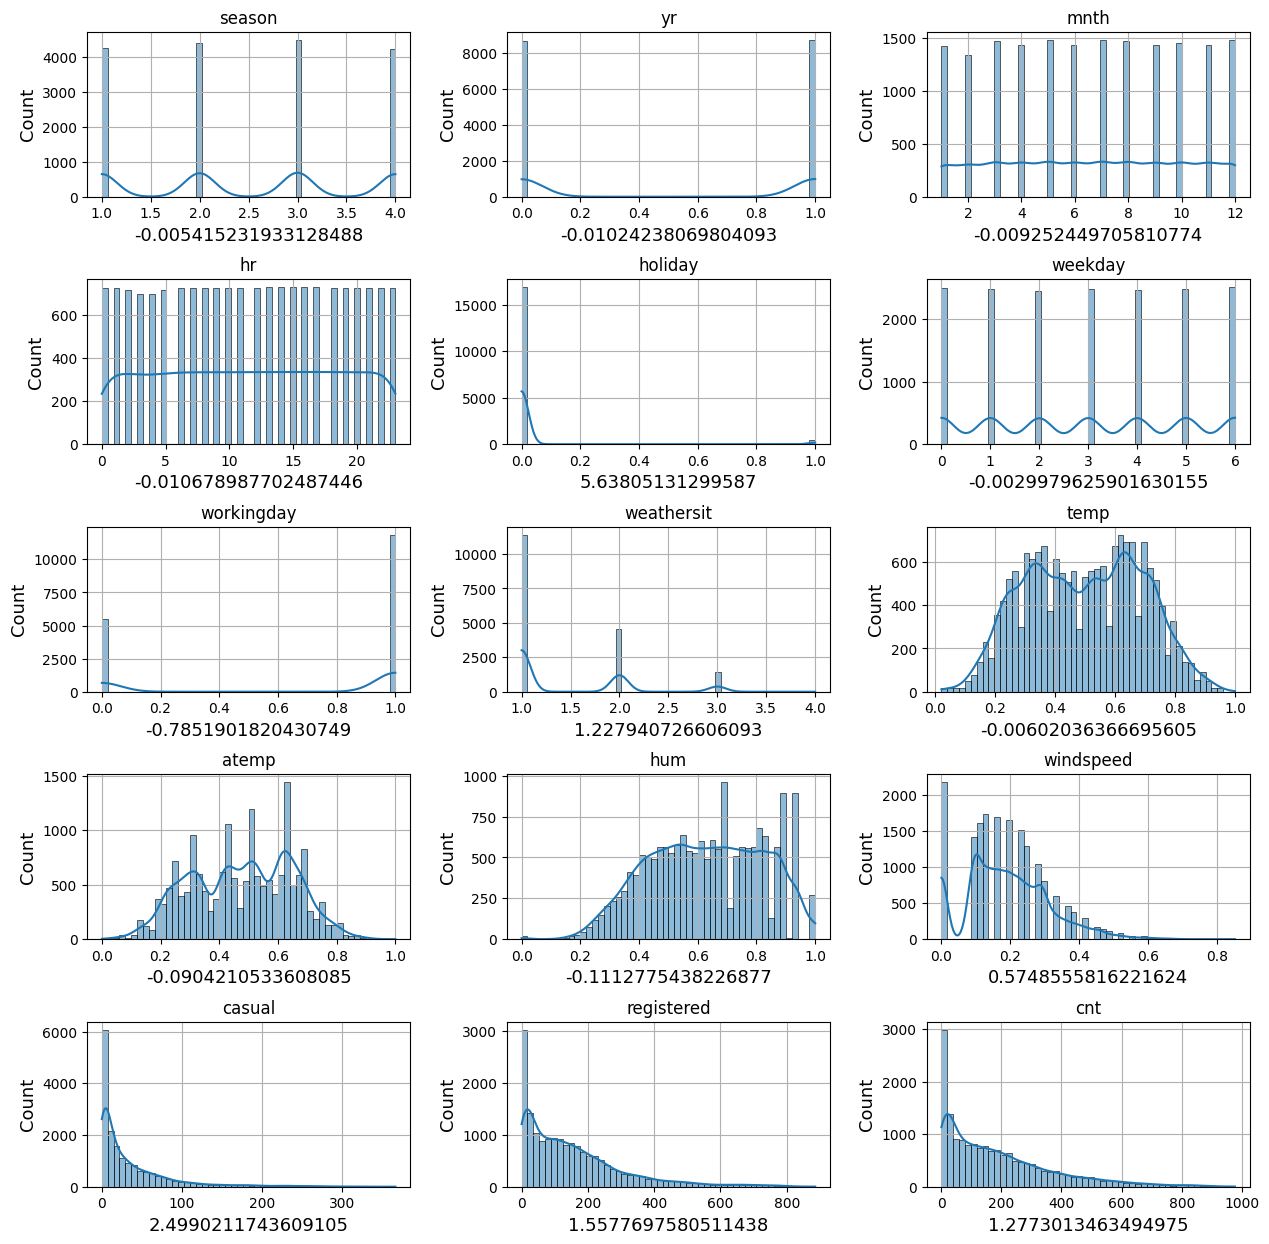

In [16]:
# Look data distribution of the data df_hour

# Set Parameter column
cols = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']

# Set figure plt
plt.figure(figsize=(15,15))

# Make looping to create subplot the distribution from each feature
for i, col in enumerate(cols):
    # Determine the number of sublots
    plt.subplot(5,3,i+1)
    
    # Declare value x and y label
    plt.xlabel(f'{skew(df_hour[col])}', fontsize=13)
    plt.ylabel("Count", fontsize=13)
    
    # Adjustment
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.grid(True)
    
    # Create text title
    plt.title(col)
    
    # Plotting
    sns.histplot(data=df_hour, x=col, bins=50, kde=True)

Text(0.5, 1.0, 'Triangle Correlation Heatmap df_day')

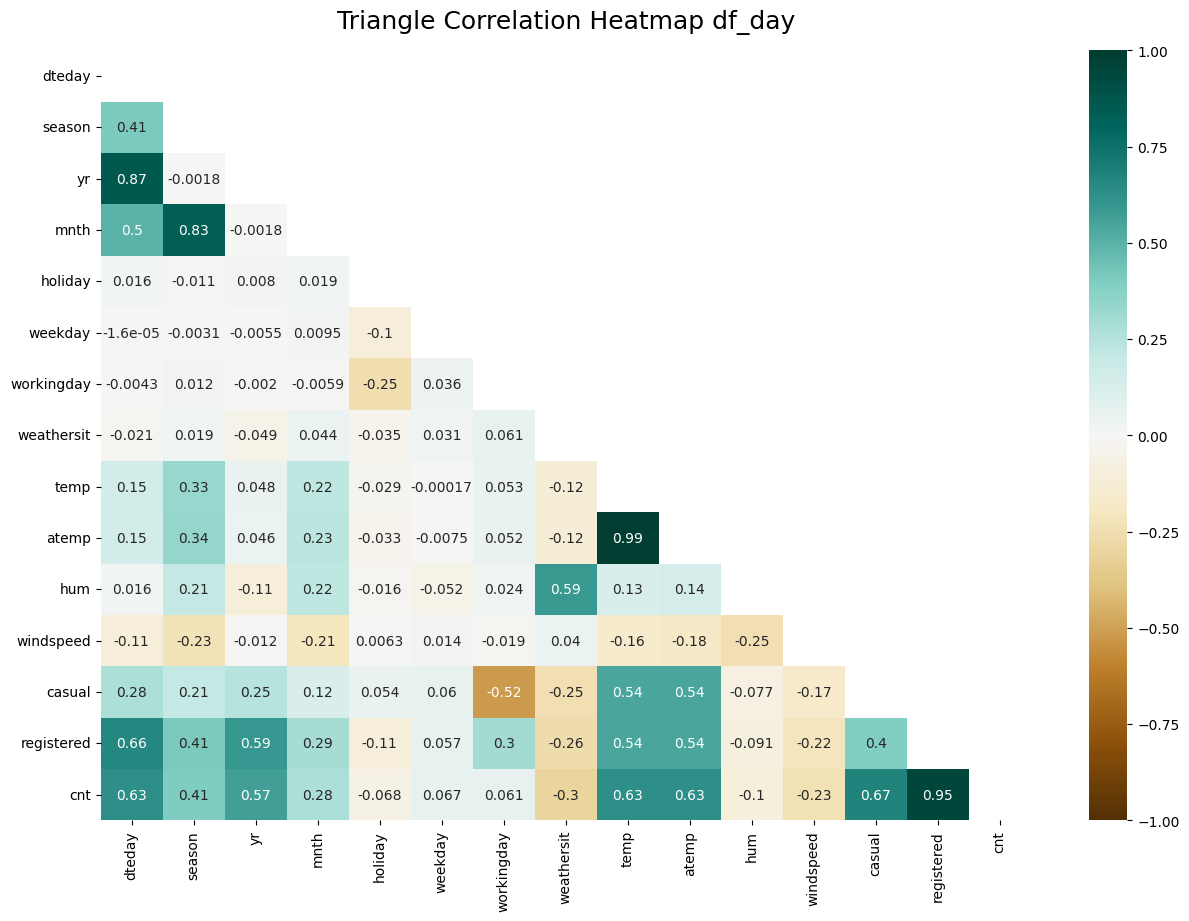

In [17]:
# Look data corelation of the data df_day

# Set figure plt
plt.figure(figsize=(15,10), dpi=100)

# Create mask
mask = np.triu(np.ones_like(df_day.corr()))

# Plotting
heatmap = sns.heatmap(df_day.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set the title
heatmap.set_title('Triangle Correlation Heatmap df_day', fontdict={'fontsize':18}, pad=16)

Text(0.5, 1.0, 'Triangle Correlation Heatmap df_hour')

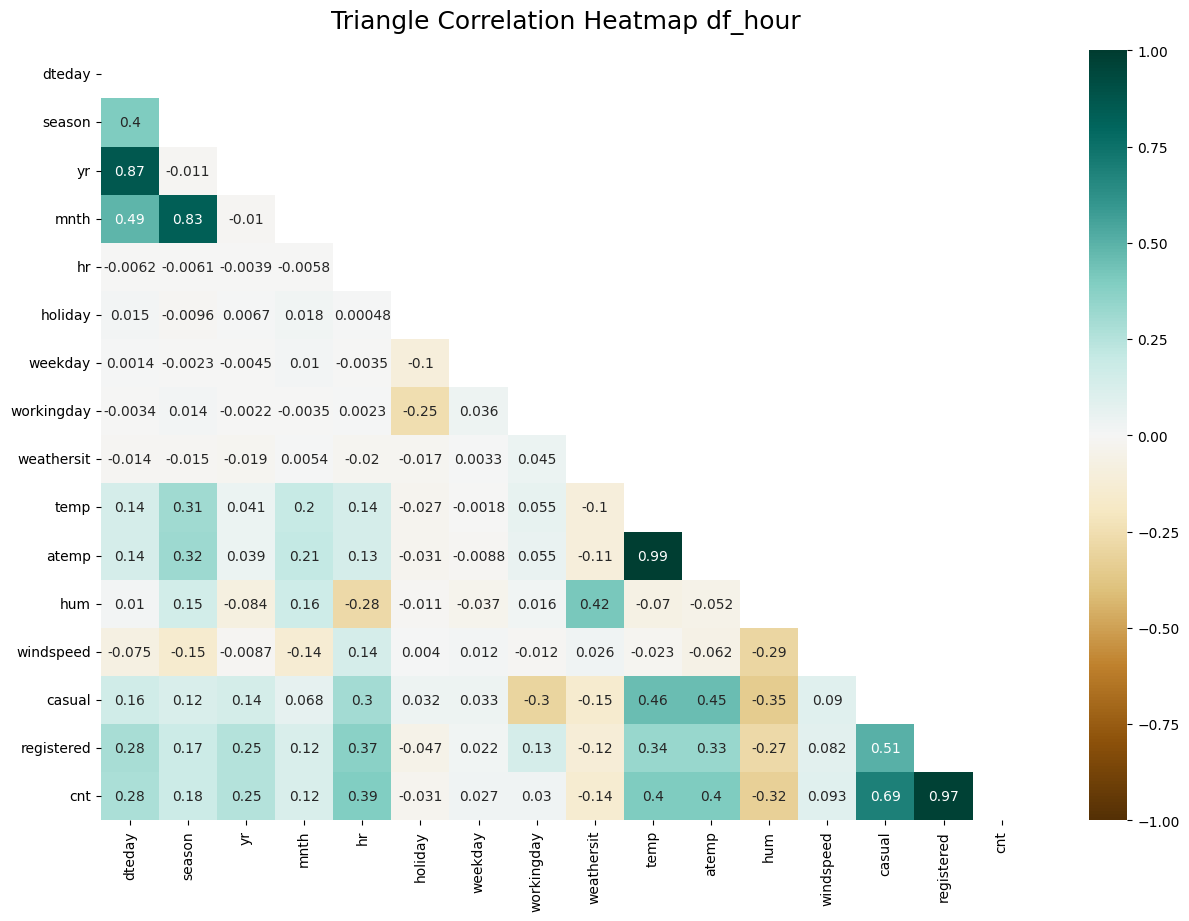

In [18]:
# Look data corelation of the data df_hour

# Set figure plt
plt.figure(figsize=(15,10), dpi=100)

# Create mask
mask = np.triu(np.ones_like(df_hour.corr()))

# Plotting
heatmap = sns.heatmap(df_hour.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Set the title
heatmap.set_title('Triangle Correlation Heatmap df_hour', fontdict={'fontsize':18}, pad=16)

<h1 align='center'>Visualization & Explanatory Analysis</h1>

***

<p><b>Question 1: What is the trend of bicycle rental from casual, registered or both types of customers as a whole from time to time?</b></p>

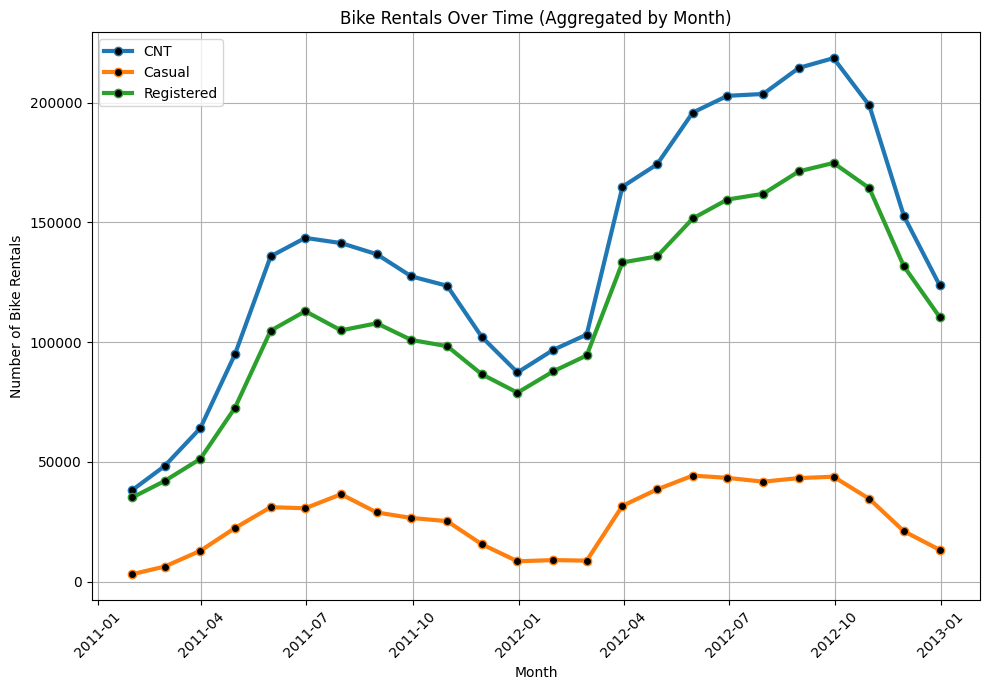

In [19]:
# Data Transformation
month_index_df = df_day.resample('M', on='dteday').sum()

# Set figure plt
plt.figure(figsize=(10, 7))

# Declare value x and y label
plt.plot(month_index_df.index, month_index_df['cnt'], marker='.', markerfacecolor='Black',markersize=12, linewidth=3)
plt.plot(month_index_df.index, month_index_df['casual'], marker='.', markerfacecolor='Black',markersize=12, linewidth=3)
plt.plot(month_index_df.index, month_index_df['registered'], marker='.', markerfacecolor='Black',markersize=12, linewidth=3)

# Set Title, label name, and legend
plt.xlabel('Month')
plt.ylabel('Number of Bike Rentals')
plt.title('Bike Rentals Over Time (Aggregated by Month)')
plt.legend(["CNT", "Casual", "Registered"], loc="upper left")

# Adjustment plot
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

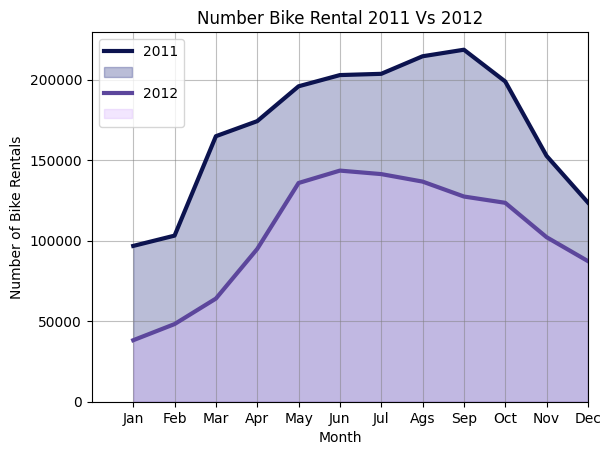

In [20]:
# Color palette
blue, = sns.color_palette("muted", 1)

# Define y1 value
df_day2011 = df_day[df_day['dteday'].dt.year == 2011]
y_2011 = []
for i in df_day['dteday'].dt.month.unique():
    sum_user = df_day2011[df_day2011['dteday'].dt.month == i]['cnt'].sum()
    y_2011.append(sum_user)

# Define y2 value
df_day2012 = df_day[df_day['dteday'].dt.year == 2012]
y_2012 = []
for i in df_day['dteday'].dt.month.unique():
    sum_user = df_day2012[df_day2012['dteday'].dt.month == i]['cnt'].sum()
    y_2012.append(sum_user)

# Define x value
x = df_day['dteday'].dt.month.unique()

# Define the plot
fig, ax = plt.subplots()

# Declare value x and y label
ax.plot(x, y_2012, color='#0C134F', lw=3)
ax.fill_between(x, 0, y_2012, alpha=.3, color='#1D267D')
ax.plot(x, y_2011, color='#5C469C', lw=3)
ax.fill_between(x, 0, y_2011, alpha=.3, color='#D4ADFC')

# Make list of month
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ags', 'Sep', 'Oct', 'Nov', 'Dec']

# Adjustment
ax.set(xlim=(0, len(x) - 1), ylim=(0, None), xticks=x, xticklabels=month_label, xlabel='Month',ylabel='Number of Bike Rentals', title="Number Bike Rental 2011 Vs 2012")
ax.legend(['2011','', '2012', ''], loc='upper left')
ax.grid(True, color = "grey", alpha=0.5, linestyle = "-")

#Show the plot
plt.show()

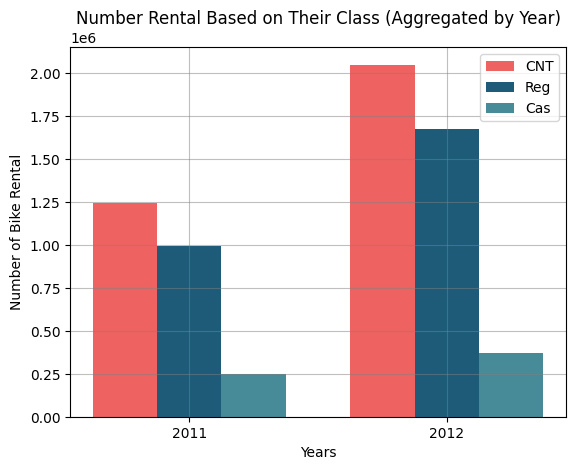

In [21]:
# Create list query to know each total value per class during 2011 and 2012 as y value for a plot
cnt = [df_day[df_day['dteday'].dt.year == 2011]['cnt'].sum(),df_day[df_day['dteday'].dt.year == 2012]['cnt'].sum()]
reg = [df_day[df_day['dteday'].dt.year == 2011]['registered'].sum(), df_day[df_day['dteday'].dt.year == 2012]['registered'].sum()]
cas = [df_day[df_day['dteday'].dt.year == 2011]['casual'].sum(), df_day[df_day['dteday'].dt.year == 2012]['casual'].sum()]

# Declare x value year
x = df_day['dteday'].dt.year.unique()

# Set width to give a space for bar chart
width = 0.25

# Declare value y label
bar_reg = plt.bar(x+width, reg, width, color='#1D5B79')
bar_cas = plt.bar(x+width*2, cas, width, color='#468B97')
bar_cnt = plt.bar(x, cnt, width, color='#EF6262')

# Set the title, label, and legend
plt.xlabel('Years')
plt.ylabel("Number of Bike Rental")
plt.title("Number Rental Based on Their Class (Aggregated by Year)")
plt.legend( (bar_cnt, bar_reg, bar_cas), ('CNT', 'Reg', 'Cas'))

# Adjustment plot
plt.grid(True, color = "grey", alpha=0.5, linestyle = "-")
plt.xticks(x+width,['2011', '2012'])

# Show the plot
plt.show()

<p><b>Answer:</b></p>

        The trend of bicycle renters from casual, registered, and a combination of both from 2011 to 2012 can be seen in the Bike Rental Over Time (Aggregated by Month) plot. The blue line in the plot shows a very significant increase in users from 2011 to 2012 and this has also been re-proved through the Number Bike Rental 2011 VS 2012 plot. Most bicycle renters in 2011 occurred in June with 143,512 bicycle renters and in 2012 the most occurred in september with 218,573 tenants. For rentals in other months, there are fluctuations because in certain months there are a lot of bicycles rented and in other months there are very few bicycle renters. This can be related to temperature and season because these two features have a high data correlation with bicycle renters as evidenced by the heatmap plot. Triangle Correlation Heatmap df day and Triangle Correlation Heatmap df hour with each correlation between 0.34-0.63.

        There are two types of tenants, namely casual and registered. The registered type has the largest portion of tenants with a total of 995,851 people in 2011 and 1,676,811 people in 2012, while the casual type has a small portion of tenants with 247,252 people in 2011 and 372,765 people in 2012. For both numbers, in 2011 the number tenants reached 1,243,103 people and in 2012 this number increased to 2,049,576 people. This is evidenced by the bar plot Number Rental Based on Their Class (Aggregated by Year).

<p><b>Question 2: What are the habits of customers renting bicycles based on season, month, day, and hour, judging by the number of rentals or the number of rentals?</b></p>

In [22]:
# Data transorfation
month_agg = df_hour.groupby("mnth").agg({
    "cnt": ["max", "mean", "sum"]
})

season_agg = df_hour.groupby("season").agg({
    "cnt": ["max", "mean", "sum"]
})

day_agg = df_hour.groupby(["weekday", "workingday"]).agg({
    "cnt": ["max", "mean", "sum"]
})

hour_agg = df_hour.groupby("hr").agg({
    "cnt": ["max", "mean", "sum"]
})

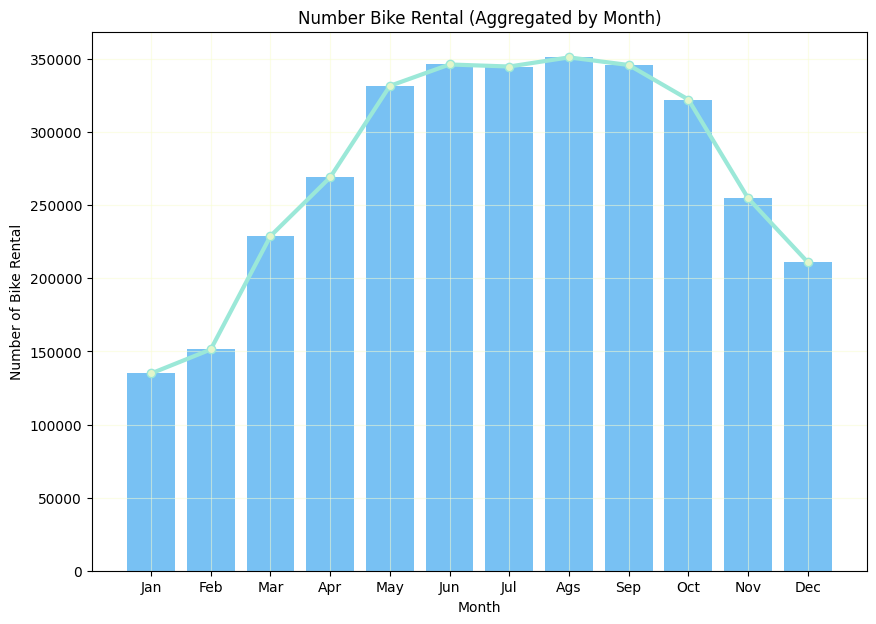

In [23]:
# Declare x value year
x = month_agg.index

# Set figure plt
plt.figure(figsize=(10, 7))


# Declare y value year
bar_chart = plt.bar(x, month_agg['cnt']['sum'], color='#78C1F3')
line_plot = plt.plot(x, month_agg['cnt']['sum'], marker='.', markerfacecolor='#E2F6CA',markersize=12, linewidth=3, color='#9BE8D8')

# Set the title, label, and legend
plt.xlabel('Month')
plt.ylabel("Number of Bike Rental")
plt.title("Number Bike Rental (Aggregated by Month)")

# Adjustment plot
plt.grid(True, color = "#F8FDCF", alpha=0.5, linestyle = "-")
plt.xticks(x, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ags', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()

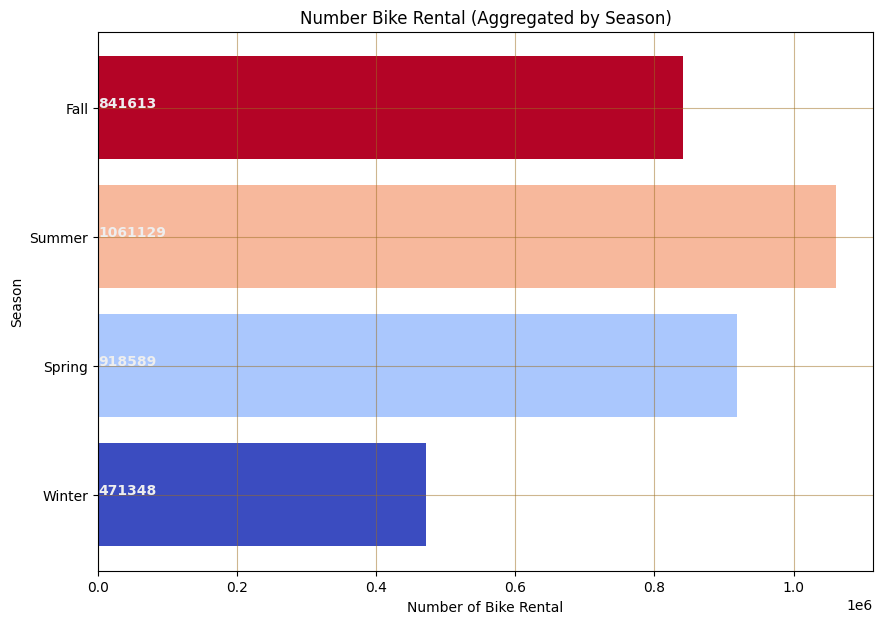

In [24]:
# Declare x value year
x = season_agg.index
y = season_agg['cnt']['sum']

# Set figure plt
plt.figure(figsize=(10, 7))

# Create a colormap
cmap = plt.get_cmap('coolwarm')

# Generate colors based on the values using the colormap
colors = cmap(np.linspace(0, 1, len(y)))

# Declare y value year
bar_chart = plt.barh(x, y, color=colors)
#color='#9E6F21', edgecolor='#4C3D3D'
# Set the title, label, and legend
plt.xlabel('Number of Bike Rental')
plt.ylabel("Season")
plt.title("Number Bike Rental (Aggregated by Season)")

# Anotate the value
values = season_agg[('cnt', 'sum')].tolist()
plt.text(1, 1, str(values[0]), fontweight='bold', color='#EEEEEE')
plt.text(1, 2, str(values[1]), fontweight='bold', color='#EEEEEE')
plt.text(1, 3, str(values[2]), fontweight='bold', color='#EEEEEE')
plt.text(1, 4, str(values[3]), fontweight='bold', color='#EEEEEE')

# Adjustment plot
plt.grid(True, color = "#9E6F21", alpha=0.5, linestyle = "-")
plt.yticks(x, ['Winter', 'Spring', 'Summer', 'Fall'])

# Show the plot
plt.show()

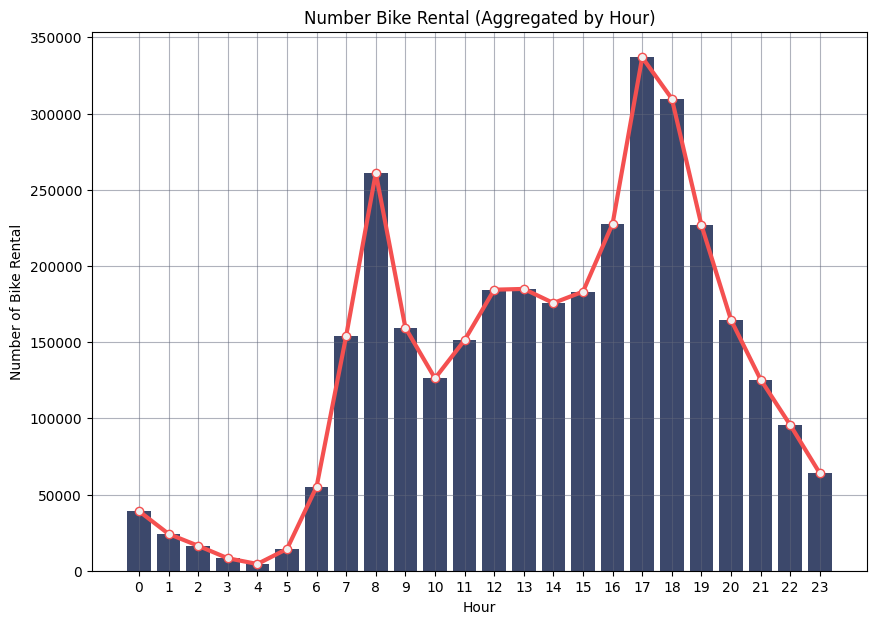

In [25]:
# Declare x value year
x = hour_agg.index

# Set figure plt
plt.figure(figsize=(10, 7))


# Declare y value year
bar_chart = plt.bar(x, hour_agg['cnt']['sum'], color='#3C486B')
line_plot = plt.plot(x, hour_agg['cnt']['sum'], marker='.', markerfacecolor='#F0F0F0',markersize=12, linewidth=3, color='#F45050')

# Set the title, label, and legend
plt.xlabel('Hour')
plt.ylabel("Number of Bike Rental")
plt.title("Number Bike Rental (Aggregated by Hour)")

# Adjustment plot
hr_labels = [str(i) for i in x]
plt.grid(True, color = "#61677A", alpha=0.5, linestyle = "-")
plt.xticks(x, hr_labels)

# Show the plot
plt.show()

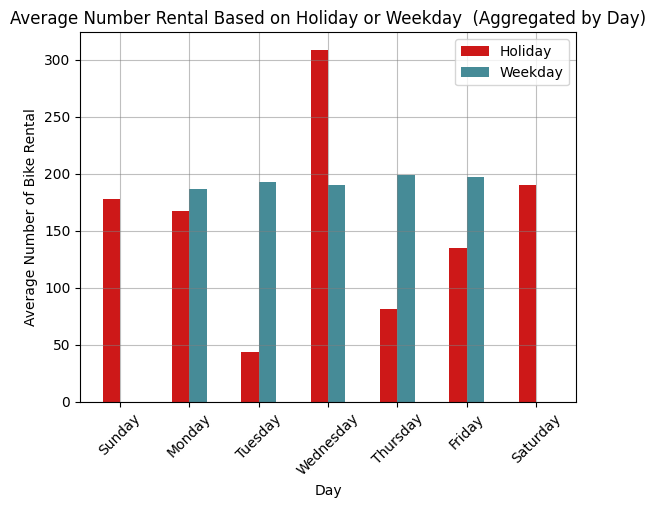

In [26]:
# Create list value for average rentaler holiday and weekday season
list_holiday = []
for i in range(7):
    list_holiday.append(day_agg.loc[(i, 0), ('cnt','mean')])
    
list_weekday = []
for i in range(5):
    list_weekday.append(day_agg.loc[(1+i, 1), ('cnt','mean')])
list_weekday.insert(0,0)
list_weekday.append(0)

x = day_agg.index.levels[0]

# Set width to give a space for bar chart
width = 0.25

bar_hol = plt.bar(x, list_holiday, width, color='#CD1818')
bar_week = plt.bar(x + width, list_weekday, width, color='#468B97')

# Set the title, label, and legend
plt.xlabel('Day')
plt.ylabel("Average Number of Bike Rental")
plt.title("Average Number Rental Based on Holiday or Weekday  (Aggregated by Day)")
plt.legend( (bar_hol, bar_week), ('Holiday', 'Weekday'))

# Adjustment plot
plt.grid(True, color = "grey", alpha=0.5, linestyle = "-")
plt.xticks(x+width/2,['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation=45)

# Show the plot
plt.show()

<p><b>Answer:</b></p>

       Customer habits in renting bicycles based on season, month, day and hour will be explained using several plots. First, the customer's bicycle rental habits based on season can be seen in the Number Bike Rental plot (Aggregated by Season). In this plot it can be seen that the season most often used for renting bicycles is summer with a total of 1,061,129 people renting, followed by spring with 918,589 people, fall as many as 841,613 people, and the least in winter with 471,348 people.

       Bike rental habits by customers by month can be seen in the Number Bike Rental plot (Aggregated by Month). It can be seen in the plot that people who rent bicycles with the highest peak are in May to October where the month is expected to occur in the summer season with total rentals between 322,352 people to 351,194 people. winter heading into spring with rental figures of 134,933 people to 151,352 people.

        Bike rental habits by customers by day can be seen in the Average Number Rental Based on Holiday or Weekday (Aggregated by Day) plot. In the plot it can be seen that there are two types of days in the week, namely holidays and working days. On weekdays, the average number of people renting bicycles is quite stable at 150-200 rented per day. While on holidays, the average is very fluctuating where the lowest is less than 50 tenants per day to more than 300 tenants per day.

        Bike rental habits by customers by month can be seen in the Number Bike Rental (Aggregated by Hour) plot. It can be seen in the table that there are two peaks of the number of people renting bicycles, namely at 7-9 in the morning and 4-19 in the afternoon where these times are the time to go to and from school or work, especially in the morning and evening it is very suitable because of the cooler temperatures. not too hot. Meanwhile, between 12-5 am is the rarest time for people to rent bicycles because that time is when people are sleeping.

<p><b>Question 3: What is the correlation between the number of bicycle rentals and the temperature in a particular season?</b></p>

In [27]:
temp_agg = df_hour.groupby(by="season").agg({
    "temp": ["max", "mean", "min"]
})
temp_agg = temp_agg['temp'].apply(lambda x: x*41)

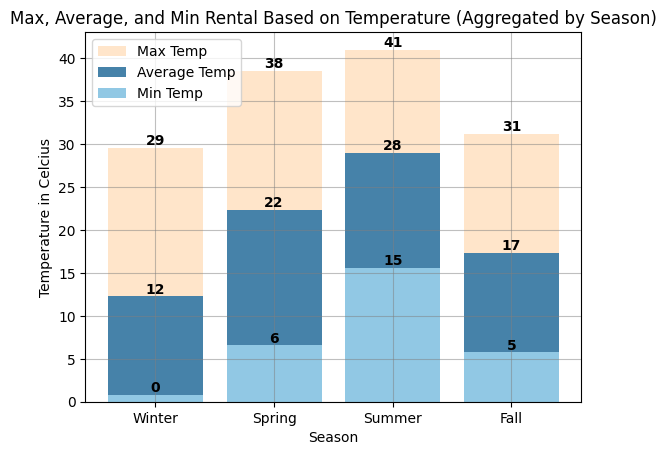

In [28]:
# Create list query to know min, avg, max of the temperature as y value for a plot
max_temp = temp_agg['max'].tolist()
min_temp = temp_agg['min'].tolist()
mean_temp = temp_agg['mean'].tolist()

# Declare x value year
x = temp_agg.index

# Declare value y label
plt.bar(x, max_temp, color='#FFE5CA', label='Max Temp')
plt.bar(x, mean_temp, color='#4682A9', label='Average Temp')
plt.bar(x, min_temp, color='#91C8E4',  label='Min Temp')

# Set the title, label, and legend
plt.xlabel('Season')
plt.ylabel("Temperature in Celcius")
plt.title("Max, Average, and Min Rental Based on Temperature (Aggregated by Season)")
plt.legend(loc="upper left")

# Annotate the maximum, average, and minimum values
for i, (max_val,mean_val, min_val) in enumerate(zip(max_temp,mean_temp, min_temp)):
    plt.text(i+1, max_val, int(max_val), ha='center', va='bottom', fontweight='bold')
    plt.text(i+1, mean_val, int(mean_val), ha='center', va='bottom', fontweight='bold')
    plt.text(i+1, min_val, int(min_val), ha='center', va='bottom', fontweight='bold')

# Adjustment plot
plt.grid(True, color = "grey", alpha=0.5, linestyle = "-")
plt.xticks(x, ['Winter', 'Spring', 'Summer', 'Fall'])

# Show the plot
plt.show()

<p><b>Answer:</b></p>

        There is a strong correlation between bicycle rotation and temperature, the magnitude of which has already been mentioned in answer number one. In the Max, Average, and Min Rental Based on Temperature (Aggregated by Season) plots, the maximum, average, and minimum temperatures in each season have been described. Spring and summer are the seasons when most people rent bicycles and you can see here the average temperature is 22-28 degrees Celsius, the maximum is 38-41 degrees Celsius. Meanwhile, spring is in the third position with the most rents where this season the average temperature is 22 degrees Celsius, the maximum is 38 degrees Celsius, and the minimum is 6 degrees Celsius. The season with the least number of flights is in winter where the temperature this season is very low compared to other seasons with an average temperature of 12 degrees Celsius, a maximum of 29 degrees Celsius, and a minimum of 0 degrees Celsius. This is correlated because warm temperatures will be perfect for outdoor activities and at cold temperatures people will rarely do outdoor activities. That way it will be directly correlated to the number or number of bicycle rentals.

<h1 align='center'>Conclusion</h1>

***

        The Bike Rental Over Time plot shows a significant increase in users during this period, which is further supported by the Number Bike Rental 2011 VS 2012 plot. Most bicycle renters occurred in June 2011 with 143,512 renters, and in September 2012 with 218,573 renters. Rental numbers fluctuate across other months, likely influenced by temperature and season, as shown in the heatmap plot. The registered type has the largest number of tenants, with 995,851 people in 2011 and 1,676,811 people in 2012. The casual type has a smaller portion, with 247,252 people in 2011 and 372,765 people in 2012. The total number of tenants in both categories increased from 1,243,103 people in 2011 to 2,049,576 people in 2012, as depicted in the Number Rental Based on Their Class bar plot.
        
        The Number Bike Rental plot (Aggregated by Season) shows that summer is the most popular season for bicycle rentals, with 1,061,129 people renting, followed by spring, fall, and winter with 918,589, 841,613, and 471,348 renters, respectively. The Number Bike Rental plot (Aggregated by Month) indicates that the highest rental peaks occur between May and October, corresponding to the summer season, with rentals ranging from 322,352 to 351,194 people. During the winter heading into spring, rentals drop to 134,933 to 151,352 people. The Average Number Rental Based on Holiday or Weekday (Aggregated by Day) plot shows that on weekdays, rentals remain stable at 150-200 per day, while on holidays, they fluctuate significantly from less than 50 to over 300 renters per day. The Number Bike Rental (Aggregated by Hour) plot reveals two rental peaks at 7-9 in the morning and 4-19 in the afternoon, corresponding to commuting times to and from school or work when the weather is cooler. The rarest time for rentals is between 12-5 am when people are sleeping.
        
        The Max, Average, and Min Rental Based on Temperature (Aggregated by Season) plots illustrate the maximum, average, and minimum temperatures in each season. Spring and summer are the peak rental seasons, with average temperatures of 22-28 degrees Celsius and maximum temperatures of 38-41 degrees Celsius. Spring follows closely with an average temperature of 22 degrees Celsius, a maximum of 38 degrees Celsius, and a minimum of 6 degrees Celsius. Winter has the least number of rentals, as it experiences very low temperatures compared to other seasons, with an average of 12 degrees Celsius, a maximum of 29 degrees Celsius, and a minimum of 0 degrees Celsius. The correlation between temperature and bike rentals is attributed to warmer temperatures being conducive to outdoor activities, while colder temperatures discourage such activities, directly influencing the number of bicycle rentals.